In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization,Activation,MaxPool2D
import matplotlib.pyplot as plt
import numpy as np
from keras import regularizers
from tensorflow.keras.optimizers.legacy import Adam
import os
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class_labels = ['Black_Rot', 'ESCA', 'Healthy', 'Leaf_Blight']
image_size = (256, 256)
batch_size = 32

## Train Data

In [3]:
# Set the paths for training images
train_path_black_rot = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/train/Black Rot"
train_path_esca = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/train/ESCA"
train_path_healthy = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/train/Healthy"
train_path_leaf_blight = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/train/Leaf Blight"

# Get file lists
files_black_rot = [os.path.join(train_path_black_rot, filename) for filename in os.listdir(train_path_black_rot)]
files_esca = [os.path.join(train_path_esca, filename) for filename in os.listdir(train_path_esca)]
files_healthy = [os.path.join(train_path_healthy, filename) for filename in os.listdir(train_path_healthy)]
files_leaf_blight = [os.path.join(train_path_leaf_blight, filename) for filename in os.listdir(train_path_leaf_blight)]


In [4]:
data_train = pd.DataFrame({
    'Class': ['Healthy'] * len(files_healthy) + ['Black Rot'] * len(files_black_rot) + ['ESCA'] * len(files_esca) + ['Leaf Blight'] * len(files_leaf_blight),
    'Filename': files_healthy + files_black_rot + files_esca + files_leaf_blight
})

# Shuffle the data
data_train = data_train.sample(frac=1, random_state=1353)

In [5]:
data_train

,Class,Filename
3202,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
3594,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
719,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
2413,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
6,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
...,...,...
137,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
1329,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
2542,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
894,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...


In [6]:
# Set the paths for validation images
validation_path_black_rot = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/validation/Black Rot"
validation_path_esca = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/validation/ESCA"
validation_path_healthy = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/validation/Healthy"
validation_path_leaf_blight = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/validation/Leaf Blight"

# Get file lists
files_black_rot = [os.path.join(validation_path_black_rot, filename) for filename in os.listdir(validation_path_black_rot)]
files_esca = [os.path.join(validation_path_esca, filename) for filename in os.listdir(validation_path_esca)]
files_healthy = [os.path.join(validation_path_healthy, filename) for filename in os.listdir(validation_path_healthy)]
files_leaf_blight = [os.path.join(validation_path_leaf_blight, filename) for filename in os.listdir(validation_path_leaf_blight)]


In [7]:
data_val = pd.DataFrame({
    'Class': ['Healthy'] * len(files_healthy) + ['Black Rot'] * len(files_black_rot) + ['ESCA'] * len(files_esca) + ['Leaf Blight'] * len(files_leaf_blight),
    'Filename': files_healthy + files_black_rot + files_esca + files_leaf_blight
})

# Shuffle the data
data_val = data_val.sample(frac=1, random_state=1353)

In [8]:
data_val 

,Class,Filename
576,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
536,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
721,Leaf Blight,/kaggle/input/grape-leaves-dataset/Grapes Leav...
8,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
575,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
...,...,...
137,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
305,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
494,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
894,Leaf Blight,/kaggle/input/grape-leaves-dataset/Grapes Leav...


In [9]:
# Set the paths for validation images
test_path_black_rot = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/test/Black Rot"
test_path_esca = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/test/ESCA"
test_path_healthy = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/test/Healthy"
test_path_leaf_blight = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/test/Leaf Blight"

# Get file lists
files_black_rot = [os.path.join(test_path_black_rot, filename) for filename in os.listdir(test_path_black_rot)]
files_esca = [os.path.join(test_path_esca, filename) for filename in os.listdir(test_path_esca)]
files_healthy = [os.path.join(test_path_healthy, filename) for filename in os.listdir(test_path_healthy)]
files_leaf_blight = [os.path.join(test_path_leaf_blight, filename) for filename in os.listdir(test_path_leaf_blight)]


In [10]:
data_test = pd.DataFrame({
    'Class': ['Healthy'] * len(files_healthy) + ['Black Rot'] * len(files_black_rot) + ['ESCA'] * len(files_esca) + ['Leaf Blight'] * len(files_leaf_blight),
    'Filename': files_healthy + files_black_rot + files_esca + files_leaf_blight
})

# Shuffle the data
data_test = data_test.sample(frac=1, random_state=1353)

In [11]:
data_test

,Class,Filename
576,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
536,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
721,Leaf Blight,/kaggle/input/grape-leaves-dataset/Grapes Leav...
8,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
575,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
...,...,...
137,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
305,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
494,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
894,Leaf Blight,/kaggle/input/grape-leaves-dataset/Grapes Leav...


In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.05,  # Randomly shift the width of the image by up to 10%.
    height_shift_range=0.05,  # Randomly shift the height of the image by up to 10%.
    shear_range=0.05,  # Randomly apply shear transformations.
    zoom_range=0.05,  # Randomly zoom in/out by up to 20%.
    horizontal_flip=True,  # Randomly flip images horizontally.
    brightness_range=(0.7, 1.3),  # Randomly adjust brightness.
    channel_shift_range=10.0,  # Randomly shift color channels.
    fill_mode='nearest'  # Filling method for new pixels after transformations.
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
   )

val_datagen = ImageDataGenerator(
    rescale=1./255,
   )

In [13]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=data_train,
    directory="",
    x_col="Filename",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=data_val,
    directory="",
    x_col="Filename",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=data_test,
    directory="",
    x_col="Filename",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 7222 validated image filenames belonging to 4 classes.
Found 902 validated image filenames belonging to 4 classes.
Found 902 validated image filenames belonging to 4 classes.


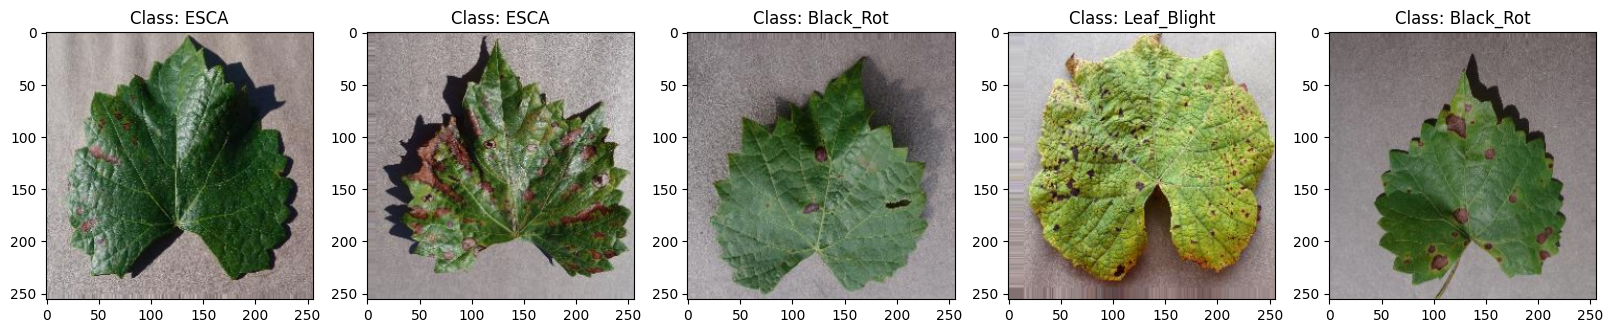

In [14]:
sample_images, sample_labels = next(train_generator)

fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    axes[i].imshow(sample_images[i])
    class_label = sample_labels[i]
    class_name = class_labels[np.argmax(class_label)]  
    axes[i].set_title("Class: " + class_name)

plt.show()

In [15]:
# Function to remove background using rembg library
def remove_background(input_path, output_path):
    input_img = cv2.imread(input_path)
    output_img = remove(input_img)
    cv2.imwrite(output_path, output_img)

In [16]:
# Remove background from all images in the 'train' directory
# train_dir = 'Grapes Leaves Dataset/train'
# for class_label in class_labels:
#     class_dir = f'{train_dir}/{class_label}'
#     os.makedirs(f'{train_dir}_no_bg/{class_label}', exist_ok=True)
#     for img_file in os.listdir(class_dir):
#         input_path = os.path.join(class_dir, img_file)
#         output_path = f'{train_dir}_no_bg/{class_label}/{img_file}'
#         remove_background(input_path, output_path)

# # Remove background from all images in the 'test' directory
# test_dir = 'Grapes Leaves Dataset/test'
# for class_label in class_labels:
#     class_dir = f'{test_dir}/{class_label}'
#     os.makedirs(f'{test_dir}_no_bg/{class_label}', exist_ok=True)
#     for img_file in os.listdir(class_dir):
#         input_path = os.path.join(class_dir, img_file)
#         output_path = f'{test_dir}_no_bg/{class_label}/{img_file}'
#         remove_background(input_path, output_path)


# Remove background from all images in the 'validation' directory
# val_dir = 'Grapes Leaves Dataset/validation'
# for class_label in class_labels:
#     class_dir = f'{val_dir}/{class_label}'
#     os.makedirs(f'{val_dir}_no_bg/{class_label}', exist_ok=True)
#     for img_file in os.listdir(class_dir):
#         input_path = os.path.join(class_dir, img_file)
#         output_path = f'{val_dir}_no_bg/{class_label}/{img_file}'
#         remove_background(input_path, output_path)


Count of Images in each Class of Training dataset - 

Total number of images in Healthy class: 1692
Total number of images in Leaf Blight class: 1722
Total number of images in Black Rot class: 1888
Total number of images in ESCA class: 1920


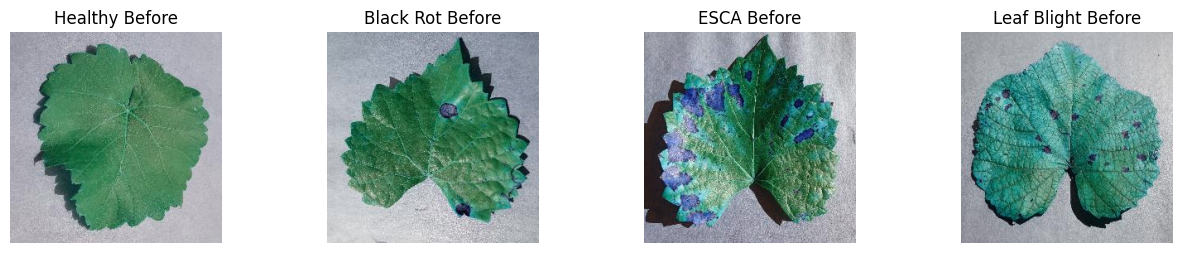

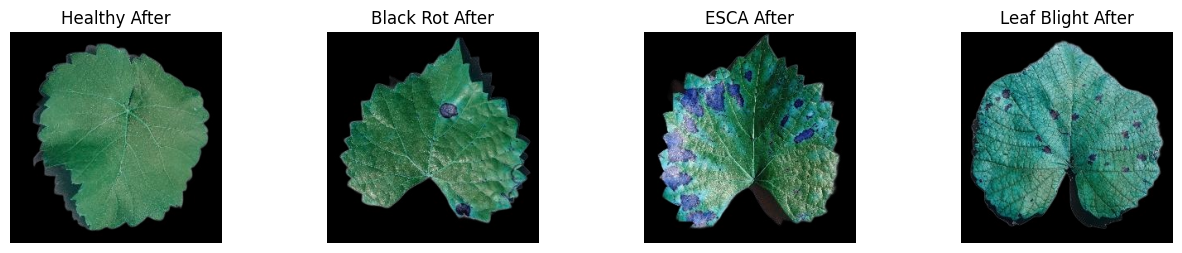

In [16]:
base_directory = 'Grapes Leaves Dataset/train'

# Get the list of folders (classes) in the base directory
class_folders = [folder for folder in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, folder))]

# Initialize a dictionary to store the counts for each class
class_counts = {folder: 0 for folder in class_folders}
print("Count of Images in each Class of Training dataset - ")
print()

# Function to display images and counts for each class
def display_class_counts(base_directory, class_folders, rows, cols):

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(base_directory, class_folder)
        class_images = [img for img in os.listdir(class_path) if img.endswith('.JPG')]
        
        # Update the class count
        class_counts[class_folder] = len(class_images)
       
    # Display total class counts
    for class_folder, count in class_counts.items():
        print(f"Total number of images in {class_folder} class: {count}")

# Function to display images
def display_images(paths, titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.ravel()

    for i in np.arange(0, rows * cols):
        img = cv2.imread(paths[i])
        if img is not None:
            axes[i].imshow(img)
            axes[i].set_title(titles[i])
            axes[i].axis('off')
        else:
            print(f"Failed to load image at path: {paths[i]}")

    plt.subplots_adjust(wspace=0.5)

display_class_counts(base_directory, class_folders, 1, 4)

before_paths = [
    'Grapes Leaves Dataset/train/Healthy/0ca59865-f0d2-4863-b4d1-a6690de53a5a___Mt.N.V_HL 6025_180deg.JPG',
	'Grapes Leaves Dataset/train/Black Rot/8498fa41-e478-47af-9974-f543ec077136___FAM_B.Rot 3279_flipLR.JPG',
	'Grapes Leaves Dataset/train/ESCA/0b351ad3-5a0c-4a62-b803-9f17fed7d3ea___FAM_B.Msls 1106.JPG',
	'Grapes Leaves Dataset/train/Leaf Blight/6fe7c718-b62b-4894-924f-c7922c6494da___FAM_L.Blight 4778.JPG'
]

after_paths = [
	'Grapes Leaves Dataset/train_no_bg/Healthy/0ca59865-f0d2-4863-b4d1-a6690de53a5a___Mt.N.V_HL 6025_180deg.JPG',
	'Grapes Leaves Dataset/train_no_bg/Black Rot/8498fa41-e478-47af-9974-f543ec077136___FAM_B.Rot 3279_flipLR.JPG',
	'Grapes Leaves Dataset/train_no_bg/ESCA/0b351ad3-5a0c-4a62-b803-9f17fed7d3ea___FAM_B.Msls 1106.JPG',
	'Grapes Leaves Dataset/train_no_bg/Leaf Blight/6fe7c718-b62b-4894-924f-c7922c6494da___FAM_L.Blight 4778.JPG'
]


# Display images before background removal
before_titles = ['Healthy Before', 'Black Rot Before', 'ESCA Before', 'Leaf Blight Before']
display_images(before_paths, before_titles, 1, 4)
plt.show()

# Display images after background removal
after_titles = ['Healthy After', 'Black Rot After', 'ESCA After', 'Leaf Blight After']
display_images(after_paths, after_titles, 1, 4)
plt.show()


In [17]:
# Set the paths for training images
train_path_black_rot = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/train_no_bg/Black Rot"
train_path_esca = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/train_no_bg/ESCA"
train_path_healthy = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/train_no_bg/Healthy"
train_path_leaf_blight = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/train_no_bg/Leaf Blight"

# Get file lists
files_black_rot = [os.path.join(train_path_black_rot, filename) for filename in os.listdir(train_path_black_rot)]
files_esca = [os.path.join(train_path_esca, filename) for filename in os.listdir(train_path_esca)]
files_healthy = [os.path.join(train_path_healthy, filename) for filename in os.listdir(train_path_healthy)]
files_leaf_blight = [os.path.join(train_path_leaf_blight, filename) for filename in os.listdir(train_path_leaf_blight)]


In [18]:
data_train = pd.DataFrame({
    'Class': ['Healthy'] * len(files_healthy) + ['Black Rot'] * len(files_black_rot) + ['ESCA'] * len(files_esca) + ['Leaf Blight'] * len(files_leaf_blight),
    'Filename': files_healthy + files_black_rot + files_esca + files_leaf_blight
})

# Shuffle the data
data_train = data_train.sample(frac=1, random_state=1353)

In [19]:
data_train

,Class,Filename
3202,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
3594,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
719,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
2413,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
6,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
...,...,...
137,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
1329,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
2542,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
894,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...


In [20]:
# Set the paths for validation images
validation_path_black_rot = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/validation_no_bg/Black Rot"
validation_path_esca = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/validation_no_bg/ESCA"
validation_path_healthy = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/validation_no_bg/Healthy"
validation_path_leaf_blight = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/validation_no_bg/Leaf Blight"

# Get file lists
files_black_rot = [os.path.join(validation_path_black_rot, filename) for filename in os.listdir(validation_path_black_rot)]
files_esca = [os.path.join(validation_path_esca, filename) for filename in os.listdir(validation_path_esca)]
files_healthy = [os.path.join(validation_path_healthy, filename) for filename in os.listdir(validation_path_healthy)]
files_leaf_blight = [os.path.join(validation_path_leaf_blight, filename) for filename in os.listdir(validation_path_leaf_blight)]


In [21]:
data_val = pd.DataFrame({
    'Class': ['Healthy'] * len(files_healthy) + ['Black Rot'] * len(files_black_rot) + ['ESCA'] * len(files_esca) + ['Leaf Blight'] * len(files_leaf_blight),
    'Filename': files_healthy + files_black_rot + files_esca + files_leaf_blight
})

# Shuffle the data
data_val = data_val.sample(frac=1, random_state=1353)

In [22]:
data_val

,Class,Filename
576,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
536,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
721,Leaf Blight,/kaggle/input/grape-leaves-dataset/Grapes Leav...
8,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
575,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
...,...,...
137,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
305,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
494,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
894,Leaf Blight,/kaggle/input/grape-leaves-dataset/Grapes Leav...


In [23]:
# Set the paths for validation images
test_path_black_rot = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/test_no_bg/Black Rot"
test_path_esca = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/test_no_bg/ESCA"
test_path_healthy = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/test_no_bg/Healthy"
test_path_leaf_blight = "/kaggle/input/grape-leaves-dataset/Grapes Leaves Dataset/test_no_bg/Leaf Blight"

# Get file lists
files_black_rot = [os.path.join(test_path_black_rot, filename) for filename in os.listdir(test_path_black_rot)]
files_esca = [os.path.join(test_path_esca, filename) for filename in os.listdir(test_path_esca)]
files_healthy = [os.path.join(test_path_healthy, filename) for filename in os.listdir(test_path_healthy)]
files_leaf_blight = [os.path.join(test_path_leaf_blight, filename) for filename in os.listdir(test_path_leaf_blight)]


In [24]:
data_test = pd.DataFrame({
    'Class': ['Healthy'] * len(files_healthy) + ['Black Rot'] * len(files_black_rot) + ['ESCA'] * len(files_esca) + ['Leaf Blight'] * len(files_leaf_blight),
    'Filename': files_healthy + files_black_rot + files_esca + files_leaf_blight
})

# Shuffle the data
data_test = data_test.sample(frac=1, random_state=1353)

In [25]:
data_test

,Class,Filename
576,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
536,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
721,Leaf Blight,/kaggle/input/grape-leaves-dataset/Grapes Leav...
8,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
575,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
...,...,...
137,Healthy,/kaggle/input/grape-leaves-dataset/Grapes Leav...
305,Black Rot,/kaggle/input/grape-leaves-dataset/Grapes Leav...
494,ESCA,/kaggle/input/grape-leaves-dataset/Grapes Leav...
894,Leaf Blight,/kaggle/input/grape-leaves-dataset/Grapes Leav...


In [26]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=data_train,
    directory="",
    x_col="Filename",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=data_val,
    directory="",
    x_col="Filename",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=data_test,
    directory="",
    x_col="Filename",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 7222 validated image filenames belonging to 4 classes.
Found 902 validated image filenames belonging to 4 classes.
Found 902 validated image filenames belonging to 4 classes.


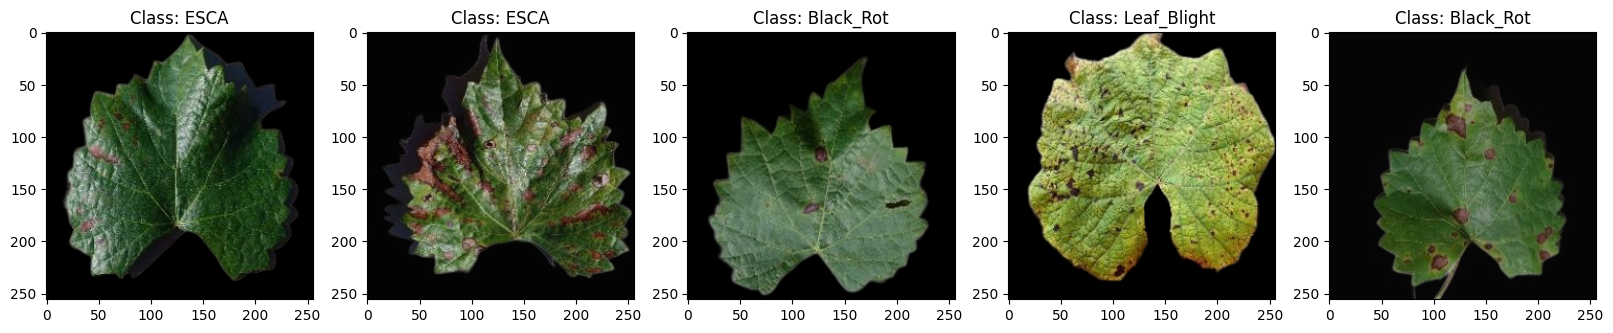

In [27]:
sample_images, sample_labels = next(train_generator)

fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    axes[i].imshow(sample_images[i])
    class_label = sample_labels[i]
    class_name = class_labels[np.argmax(class_label)]  
    axes[i].set_title("Class: " + class_name)

plt.show()

In [28]:
# Define the CNN model
model=Sequential() 
model.add(Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       7

In [30]:
from tensorflow.keras.callbacks import ProgbarLogger, LambdaCallback

epochs = 20
steps_per_epoch = -(-len(train_generator.filenames) // batch_size)
validation_steps = -(-len(validation_generator.filenames) // batch_size)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ProgbarLogger(count_mode="steps", stateful_metrics=None),
    LambdaCallback(
        on_epoch_end=lambda epoch, logs: print(
            f"Epoch {epoch+1} finished.\n"
            f"loss {logs['loss']}\n"
            f"acc {logs['accuracy']}\n"
            f"loss_val {logs['val_loss']}\n"
            f"acc_val {logs['val_accuracy']}"
        )
    )
]

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=True,
    callbacks=callbacks
)

Epoch 1/20
226/226 [==============================] - 178s 746ms/step - loss: 0.6243 - accuracy: 0.7533 - val_loss: 0.2740 - val_accuracy: 0.8925
Epoch 1 finished.
loss 0.6242591738700867
acc 0.7532539367675781
loss_val 0.27400606870651245
acc_val 0.8924611806869507
Epoch 2/20
226/226 [==============================] - 120s 529ms/step - loss: 0.3217 - accuracy: 0.8849 - val_loss: 0.2060 - val_accuracy: 0.9180
Epoch 2 finished.
loss 0.32168909907341003
acc 0.8849349021911621
loss_val 0.20599967241287231
acc_val 0.9179601073265076
Epoch 3/20
226/226 [==============================] - 121s 533ms/step - loss: 0.2607 - accuracy: 0.9079 - val_loss: 0.3569 - val_accuracy: 0.8703
Epoch 3 finished.
loss 0.2607491612434387
acc 0.907920241355896
loss_val 0.356901615858078
acc_val 0.8702882528305054
Epoch 4/20
226/226 [==============================] - 119s 525ms/step - loss: 0.1817 - accuracy: 0.9344 - val_loss: 0.0852 - val_accuracy: 0.9634
Epoch 4 finished.
loss 0.18166354298591614
acc 0.934367

In [31]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

29/29 [==============================] - 7s 259ms/step - loss: 0.0093 - accuracy: 0.9945
Test Accuracy: 0.9944567680358887
Test Loss: 0.009318497963249683


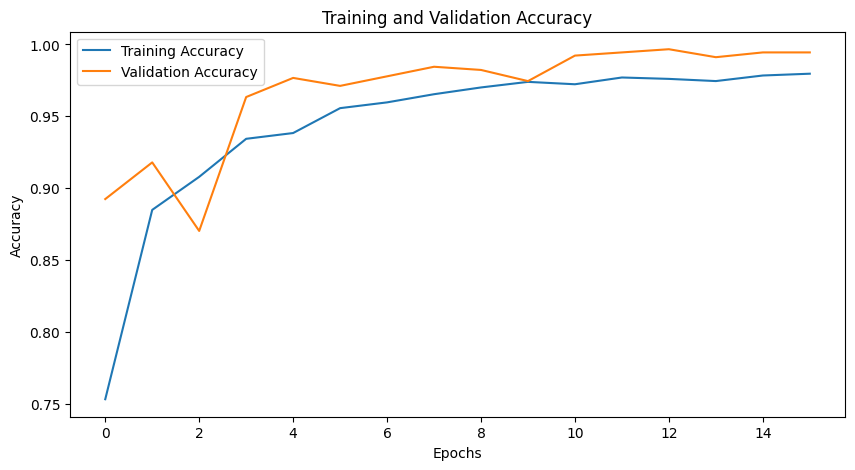

In [32]:
# Training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


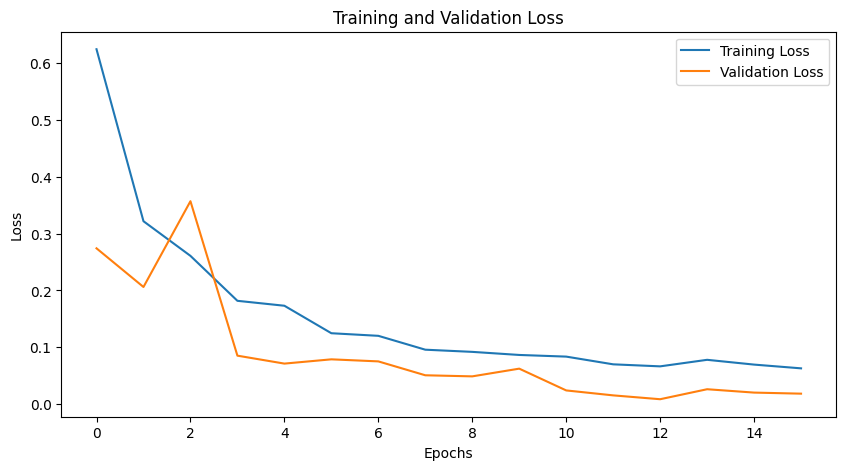

In [33]:
# Training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [34]:
# Predictions on test data
test_predictions = model.predict(test_generator)

29/29 [==============================] - 3s 84ms/step


29/29 [==============================] - 2s 69ms/step - loss: 0.0093 - accuracy: 0.9945
Test Accuracy: 0.9944567680358887
Test Loss: 0.009318497963249683
29/29 [==============================] - 3s 85ms/step

Classification Report:
              precision    recall  f1-score   support

   Black_Rot       1.00      0.98      0.99       235
        ESCA       0.98      1.00      0.99       240
     Healthy       1.00      1.00      1.00       212
 Leaf_Blight       1.00      1.00      1.00       215

    accuracy                           0.99       902
   macro avg       0.99      0.99      0.99       902
weighted avg       0.99      0.99      0.99       902



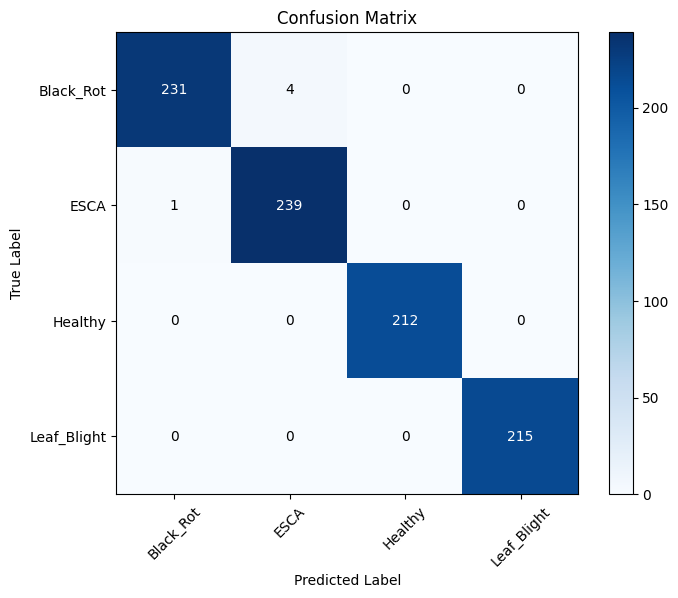

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

# Generate predictions for the test set
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Obtain true class labels
y_true = test_generator.classes

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the values in each cell of the confusion matrix
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()


In [36]:
# Save the model and its weights
model.save('my_model(99.44%).h5')
model.save('my_model(99.44%).keras')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
